In [3]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

zsh:1: command not found: wget


In [4]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('data/airline_passengers.csv',index_col='Month',parse_dates=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [8]:
df.isna().sum()

Passengers    0
dtype: int64

<AxesSubplot:xlabel='Month'>

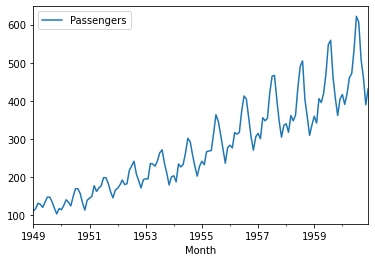

In [9]:
df.plot()

In [10]:
alpha=0.2
df["EWMA"]=df["Passengers"].ewm(alpha=alpha,adjust=False).mean()

<AxesSubplot:xlabel='Month'>

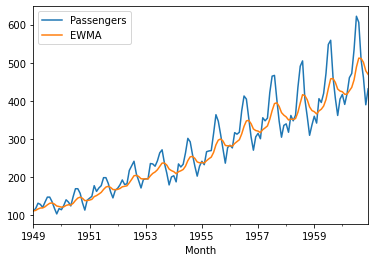

In [11]:
df.plot()

In [12]:
type(df["Passengers"].ewm(alpha=alpha,adjust=False))

pandas.core.window.ewm.ExponentialMovingWindow

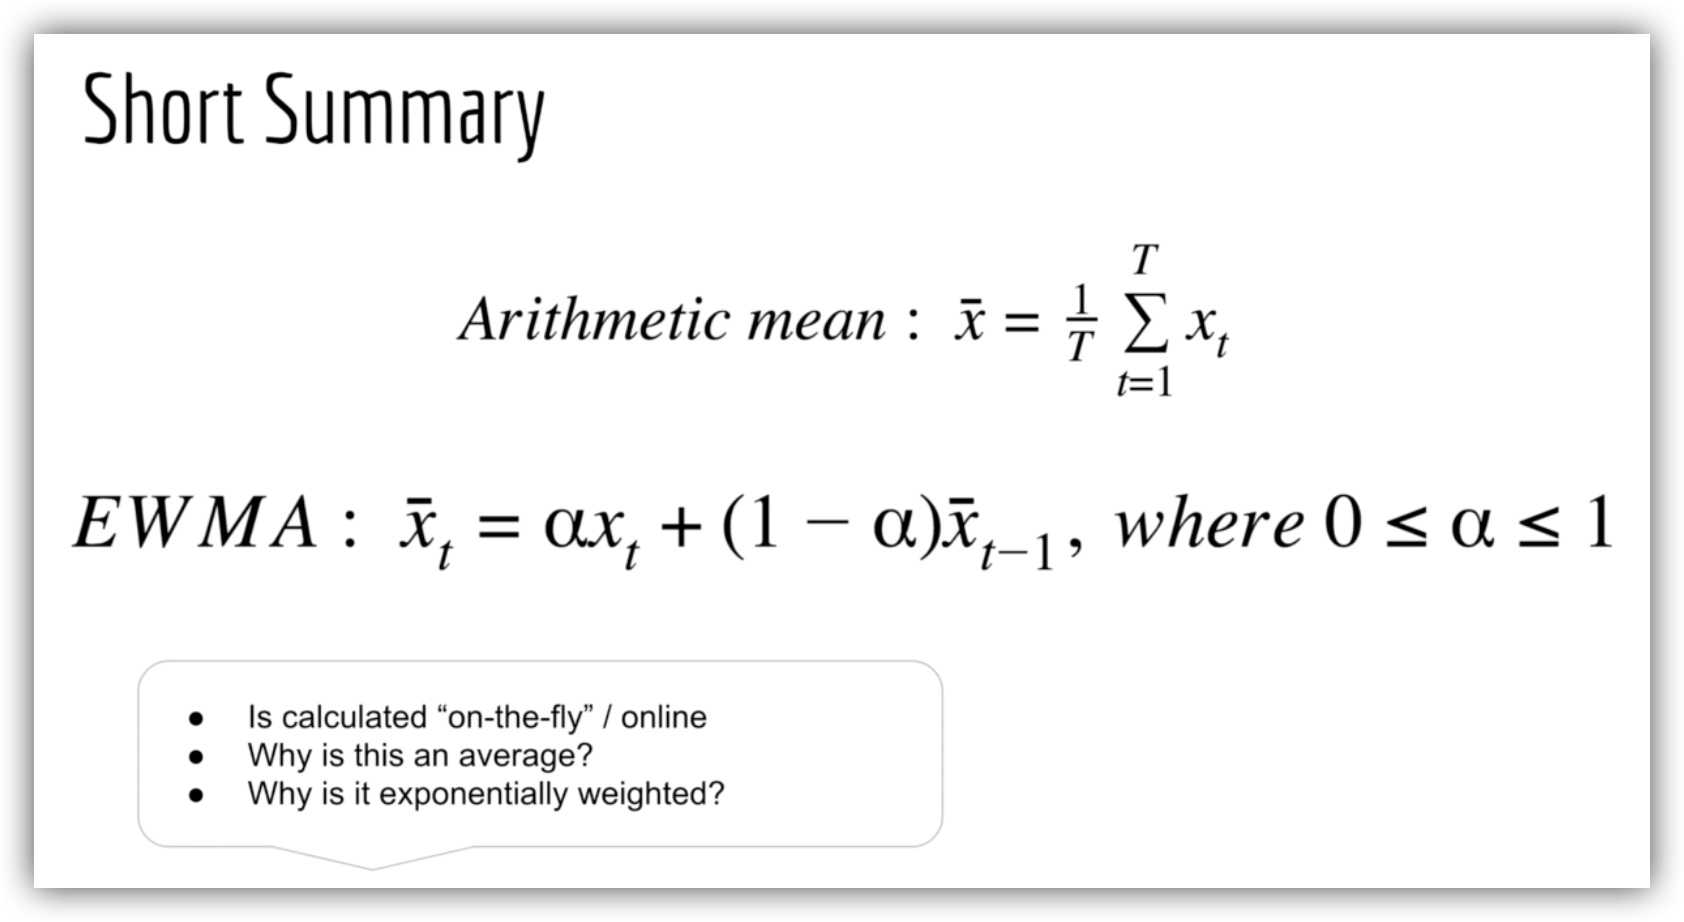

In [15]:
from IPython.display import Image
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/TimeSeries/Lazy Programmers/Image/2021-10-23_14-36-33.jpg')

In [13]:
manual_ewma=[]
for x in df["Passengers"].to_numpy():
    if len(manual_ewma)>0:
        xhat=alpha * x + (1-alpha)*manual_ewma[-1]
    else:
        xhat=x;
    manual_ewma.append(xhat)

df["Manual_EWMA"]=manual_ewma

In [16]:
df.head()

,Passengers,EWMA,Manual_EWMA
Month,,,
1949-01-01,112,112.0000,112.0000
1949-02-01,118,113.2000,113.2000
1949-03-01,132,116.9600,116.9600
1949-04-01,129,119.3680,119.3680
1949-05-01,121,119.6944,119.6944


<AxesSubplot:xlabel='Month'>

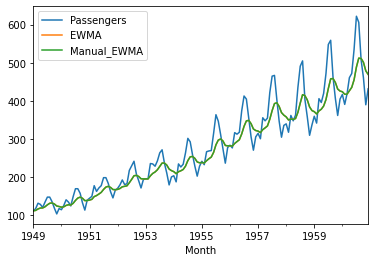

In [14]:
df.plot()

In [18]:
df.drop("Manual_EWMA",axis=1,inplace=True)

In [19]:
df

,Passengers,EWMA
Month,,
1949-01-01,112,112.000000
1949-02-01,118,113.200000
1949-03-01,132,116.960000
1949-04-01,129,119.368000
1949-05-01,121,119.694400
...,...,...
1960-08-01,606,512.214093
1960-09-01,508,511.371274
1960-10-01,461,501.297019
